# Pymaceuticals Inc.

In [1]:
#Import modules and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#Paths to files
trialscsv = "data/clinicaltrial_data.csv"
drugscsv = "data/mouse_drug_data.csv"

#Read files into dataframes
trials_df = pd.read_csv(trialscsv)
drugs_df = pd.read_csv(drugscsv)

#merge dataframes
drugtrials_df = trials_df.merge(drugs_df, on='Mouse ID', how='outer')

#Select the drugs: Capomulin, Infubinol, Ketapril, and Placebo
drugtrials_df = drugtrials_df[(drugtrials_df['Drug'] == 'Capomulin') | (drugtrials_df['Drug'] == 'Infubinol') | 
                              (drugtrials_df['Drug'] == 'Ketapril') | (drugtrials_df['Drug'] == 'Placebo')]

In [2]:
#Group by each drug and timepoint
bydrugtime_df = drugtrials_df.groupby(['Drug', 'Timepoint'])

#Find average tumor volume for each drug at each timepoint and its standard error (Tumor Response)
avgtumordt = bydrugtime_df['Tumor Volume (mm3)'].mean()
avgtumorstderr = bydrugtime_df['Tumor Volume (mm3)'].sem()

#Find the number of metastatic sites for each drug at each timepoint and its standard error (Metastatic Response)
metsitedt = bydrugtime_df['Metastatic Sites'].mean()
metsitestderr = bydrugtime_df['Metastatic Sites'].sem()

#Find the number of mice alive at each timepoint for each drug (Survival)
micealivedt = bydrugtime_df['Mouse ID'].count()

#Convert back to dataframes and reformat
#Tumor Response
avgtumor_df = pd.DataFrame(avgtumordt)
tumor_stderr = pd.DataFrame(avgtumorstderr)
pivottumor_df = pd.pivot_table(avgtumor_df, values='Tumor Volume (mm3)', columns=['Drug'], index=['Timepoint'])
pivottumor_stderr = pd.pivot_table(tumor_stderr, values='Tumor Volume (mm3)', columns=['Drug'], index=['Timepoint'])

#Metastatic Response
metsite_df = pd.DataFrame(metsitedt)
met_stderr = pd.DataFrame(metsitestderr)
pivotmetsite_df = pd.pivot_table(metsite_df, values='Metastatic Sites', columns=['Drug'], index=['Timepoint'])
pivotmet_stderr = pd.pivot_table(met_stderr, values='Metastatic Sites', columns=['Drug'], index=['Timepoint'])

#Survival
surv_df = pd.DataFrame(micealivedt)
pivotsurv_df = pd.pivot_table(surv_df, values='Mouse ID', columns=['Drug'], index=['Timepoint'])

#Convert to a survival rate to a percentage
persurv_df = pivotsurv_df * 100 / pivotsurv_df.iloc[0, :]

## Tumor Response to Treatment

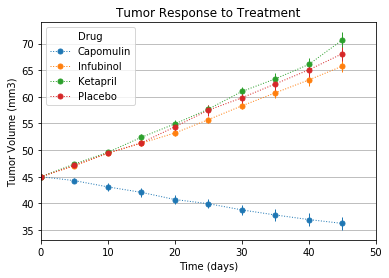

In [6]:
#Tumor Response

#Plot line graph of tumor response
tumorplot = pivottumor_df.plot(title= 'Tumor Response to Treatment', yerr=pivottumor_stderr, marker='o', ls=':',
                               lw=1, xlim=(0,50), ms=5)
tumorplot.set_xlabel('Time (days)')
tumorplot.set_ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')
plt.savefig('fig1.png')

## Metastatic Response to Treatment

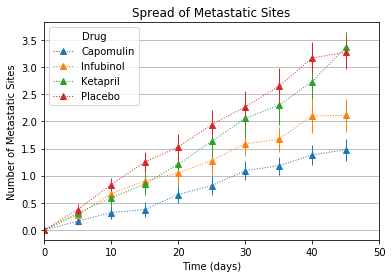

In [8]:
#Plot line graph of metastatic response
metplot = pivotmetsite_df.plot(title= 'Spread of Metastatic Sites', yerr=pivotmet_stderr, marker='^', ls=':', lw=1,
                              xlim=(0,50))
#plt.scatter
metplot.set_xlabel('Time (days)')
metplot.set_ylabel('Number of Metastatic Sites')
plt.grid(axis='y')
plt.savefig('fig2.png')

## Survival Rate During Treatment

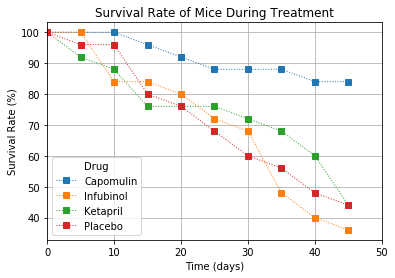

In [5]:
#Plot line graph of survival of mice over time
survplot = persurv_df.plot(title= 'Survival Rate of Mice During Treatment', marker='s', ls=':', lw=1, xlim=(0,50))
survplot.set_xlabel('Time (days)')
survplot.set_ylabel('Survival Rate (%)')
plt.grid()
plt.show()

## Percent Volume Change Over 45 Days

In [6]:
#Calculate percent change
initvol = pivottumor_df.iloc[0,:]
finalvol = pivottumor_df.iloc[9,:]
perchange = (finalvol - initvol) * 100 / initvol

#Convert to dataframe and reformat
perc_df = pd.DataFrame(perchange).round(2)
perc_df.columns = ['% Change']

In [59]:
#Function that will add labels to a bar graph
#Code taken from http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

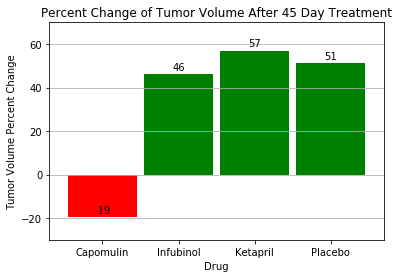

In [61]:
#Plot bar graph of the percent change of tumor volume for each drug
changeplot = perc_df.plot.bar(title='Percent Change of Tumor Volume After 45 Day Treatment',
                              legend=False, color='g', align='center', rot=0, width=.9, ylim=(-30,70))
plt.bar(0, perc_df.iloc[0], color='r', width=.9)
crects = changeplot.bar(np.arange(4), perc_df['% Change'], alpha=0)
changeplot.set_xlabel('Drug')
changeplot.set_ylabel('Tumor Volume Percent Change')
autolabel(crects, changeplot)
plt.grid(axis='y')
plt.show()